# ◆[Mushroom Classification Safe to eat or deadly poison?](https://www.kaggle.com/uciml/mushroom-classification/data)
### 目的：きのこの形状等から食用か有毒かをいくつかの分類モデルで識別し比較する
- 目的変数をclass(食用か有毒か)とする二値分類問題として複数の機械学習モデルを比較する
##### Create Date：2020/01/08　Author：M.Hasegawa
### ────────────────────────────────────────────────────────────────

#### 【手順】
0. [**Notebook内で利用する関数の定義**](#import_module)
1. [**データ読込**](#import_data)
2. [**特徴量の抽出**](#feature_extraction)
3. [**前処理**](#prepearing)
4. [**モデル構築と評価**](#modeling)
5. [**モデル評価**](#model_evaluation)

##### ※データセット「mushrooms.csv」（データ数：378,661行15列）

| id |項目|説明|型|特記事項|
|:---:|:---:|:---:|:---:|:---:|
|1|class|毒キノコか|カテゴリ|毒キノコ=p、食用キノコ=e|
|2|cap-shape|傘形状|カテゴり|ベル型=b、円錐型=c、饅頭型=x、扁平型=f、コブ型=k、凹んだ扁平型=s|
|3|cap-surface|傘表面|カテゴリ|繊維=f、溝=g、鱗片=y、滑らか=s|
|4|cap-color|傘の色|カテゴリ|ブラウン=n、バフ=b、シナモン=c、グレー=g、グリーン=r、ピンク=p、パープル=u、レッド=e、ホワイト=w、イエロー=y|
|5|bruises|斑点|2値|斑点あり=t、反転なし=f|
|6|odor|臭気|カテゴリ|アーモンド=a、アニス=l、クレオソート=c、フィッシュ=y、ファウル=f、ミューズイ=m、なし=n、辛味=p、スパイシー=s|
|7|gill-attachment|ひだの付き方|カテゴリ|直生=a、垂生=d、離生=f、凹生=n|
|8|gill-spacing|ひだの間隔|カテゴリ|近い=c、過密=w、長い=d|
|9|gill-size|ひだのサイズ|2値|広い=b、狭い=n|
|10|gill-color|ひだの色|カテゴリ|ブラック=k、ブラウン=n、バフ=b、チョコレート=h、グレー=g、グリーン=r、オレンジ=o、ピンク=p、パープル=u、レッド=e、ホワイト=w、イエロー=y|
|11|stalk-shape|柄の形状|2値|広がり=e、先細り=t|
|12|stalk-root|柄の根|カテゴリ|球根=b、クラブ=c、カップ=u、等しい=e、根茎形態=z、根=r、無し=?|
|13|stalk-surface-above-ring|柄-表面上のリング|カテゴリ|繊維状=f、鱗片状=y、絹毛=k、滑らか=s|
|14|stalk-surface-below-ring|柄-表面下のリング|カテゴリ|繊維状=f、鱗片状=y、絹毛=k、滑らか=s|
|15|stalk-color-above-ring|柄の色-上リング|カテゴリ|ブラウン=n、バフ=b、シナモン=c、グレー=g、オレンジ=o、ピンク=p、赤=e、白=w、黄色=y|
|16|stalk-color-below-ring|柄の色-下リング|カテゴリ|ブラウン=n、バフ=b、シナモン=c、グレー=g、オレンジ=o、ピンク=p、赤=e、白=w、黄色=y|
|17|veil-type|つぼの種類|2値|内皮膜=p、外皮膜=u|
|18|veil-color|つぼの色|カテゴリ|ブラウン=n、オレンジ=o、ホワイト=w、イエロー=y|
|19|ring-number|つばの数|カテゴリ|none=n、one=o、two=t|
|20|ring-type|つばの種類|カテゴリ|クモの巣状=c、消失性=e、炎のような=f、大きな=l、無し=n、垂れた=p、環帯=z|
|21|spore-print-color|胞子の色|カテゴリ|ブラック=k、ブラウン=n、バフ=b、チョコレート=h、グリーン=r、オレンジ=o、パープル=u、ホワイト=w、イエロー=y|
|22|population|集団形成方法|カテゴリ|大多数=a、群れを成して=c、多数=n、分散=s、数個=v、孤立=y|
|23|habitat|生息地|カテゴリ|牧草=g、葉=1、牧草地=m、小道=p、都市=u、廃棄物=w、森=d|

## 0. Notebook内で利用する関数の定義<a id='import_module'></a>

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss, accuracy_score, confusion_matrix,precision_recall_fscore_support
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

# 1. データ読込<a id='import_data'><a>

In [2]:
df= pd.read_csv('./input/mushrooms.csv')

print("\n▼ 先頭5行表示")
display(df.head(5))

print("\n▼ 基本統計量")
display(df.describe())

print('\n▼ 欠損データ確認')
display(pd.DataFrame(df.isnull().sum()[df.isnull().sum()>0],columns=['Missing num']))


▼ 先頭5行表示


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g



▼ 基本統計量


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148



▼ 欠損データ確認


,Missing num


# 2. 特徴量の抽出<a id='feature_extraction'></a>
## 2-1.目的変数の確認


▼ 目的変数classの種類（%）


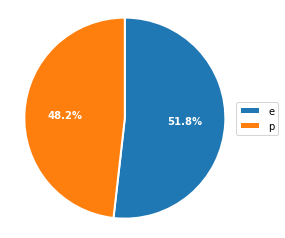

→食用のほうが若干多い

▼ 件数（食用キノコ=1，毒キノコ=0）


,class
1,4208
0,3916



▼ 食用きのこ率
baseline= 0.517971442639094

▼ 先頭5行表示


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,1,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,1,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,0,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,1,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
print('\n▼ 目的変数classの種類（%）')
per_class = round(df['class'].value_counts() / len(df['class']) * 100,2)
values = list(per_class.values)

# 円グラフ
plt.figure(figsize=(4,4))
plt.pie(values, labels=list(per_class.index),
        wedgeprops={'linewidth': 2,'edgecolor':'white'},
        textprops={'color': 'white', 'weight': 'bold'},
        counterclock=False,startangle=90,
        autopct=lambda p: '{:.1f}%'.format(p) if p >= 2.5 else '')
lgnd=plt.legend(bbox_to_anchor=(1.0, 0.25, 1.55, 0.5), loc="center left", borderaxespad=0.)
plt.axis('equal')
plt.show()
print('→食用のほうが若干多い')

# 変換（食用キノコ=1，毒キノコ=0）
df['class'] = df['class'].map({'p': 0,'e': 1})

print('\n▼ 件数（食用キノコ=1，毒キノコ=0）')
display(pd.DataFrame(df['class'].value_counts(),columns=['class']))

# 食用率の平均
print('\n▼ 食用きのこ率')
baseline = df['class'].mean()
print('baseline=',baseline)

print("\n▼ 先頭5行表示")
display(df.head(5))


## 2-2. カラムの確認

In [4]:
# ------------------------------------------------
# 2-2.カラムの確認
# ------------------------------------------------
print('\n ▼ カラムの型リスト表示 ')
col_list = df.columns.tolist() 
display(df[col_list].dtypes.sort_values()) 

# int64リスト
int_cols = df[col_list].dtypes[df[col_list].dtypes=='int64'].index.tolist()
# objectリスト
obj_cols = df[col_list].dtypes[df[col_list].dtypes=='object'].index.tolist()

# 名前の変換
v_01={"b":"bell","c":"conical","x":"convex","f":"flat","k":"knobbed","s":"sunken"}
df["cap-shape"]=df["cap-shape"].replace(v_01)
v_02={"f": "fibrous", "g": "grooves","y":"scaly","s": "smooth"}
df["cap-surface"]=df["cap-surface"].replace(v_02)
v_03={"n":"brown","b":"buff","c":"cinnamon","g":"gray","r":"green","p":"pink","u":"purple","e":"red","w":"white","y":"yellow"}
df["cap-color"]=df["cap-color"].replace(v_03)
v_04={"a":"almond","l":"anise","c":"creosote","y":"fishy","f":"foul","m":"musty","n":"none","p":"pungent","s":"spicy"}
df["odor"]=df["odor"].replace(v_04)
v_05={"a":"attached","f":"free"}
df["gill-attachment"]=df["gill-attachment"].replace(v_05)
v_06={"c":"close","w":"crowded"}
df["gill-spacing"]=df["gill-spacing"].replace(v_06)
v_07={"b":"broad","n":"narrow"}
df["gill-size"]=df["gill-size"].replace(v_07)
v_08={"k":"black","b":"buff","n":"brown","h":"chocolate","g":"gray","r":"green","o":"orange","p":"pink","u":"purple","e":"red","w":"white","y":"yellow"}
df["gill-color"]=df["gill-color"].replace(v_08)
v_09={"t":"tapering","e":"enlarging"}
df["stalk-shape"]=df["stalk-shape"].replace(v_09)
v_10={"b":"bulbous","c":"club","e":"equal","z":"rhizomorphs","r":"rooted","?":"missing"}
df["stalk-root"]=df["stalk-root"].replace(v_10)
v_11={"s":"smooth","k":"silky","f":"fibrous","y":"scaly"}
df["stalk-surface-above-ring"]=df["stalk-surface-above-ring"].replace(v_11)
df["stalk-surface-below-ring"]=df["stalk-surface-below-ring"].replace(v_11)
v_12={"n":"brown","b":"buff","c":"cinnamon","g":"gray","p":"pink","e":"red","w":"white","y":"yellow","o":"orange"}
df["stalk-color-above-ring"]=df["stalk-color-above-ring"].replace(v_12)
df["stalk-color-below-ring"]=df["stalk-color-below-ring"].replace(v_12)
v_13={"p":"partial","u":"universal"} 
df["veil-type"]=df["veil-type"].replace(v_13)
v_14={"n":"brown","o":"orange","w":"white","y":"yellow"} 
df["veil-color"]=df["veil-color"].replace(v_14)
v_15= {"n":"none","o":"one","t":"two"}
df["ring-number"]=df["ring-number"].replace(v_15)
v_16={"c":"cobwebby","e":"evanescent","f":"flaring","l":"large","n":"none","p":"pendant","s":"sheathing","z":"zone"}
df["ring-type"]=df["ring-type"].replace(v_16)
v_17= {"k":"black","n":"brown","b":"buff","h":"chocolate","r":"green","o":"orange","u":"purple","w":"white","y":"yellow"}
df["spore-print-color"]=df["spore-print-color"].replace(v_17)
v_18={"a":"abundant","c":"clustered","n":"numerous","s":"scattered","v":"several","y":"solitary"}
df["population"]=df["population"].replace(v_18)
v_19={"g":"grasses","l":"leaves","m":"meadows","p":"paths","u":"urban","w":"waste","d":"woods"}
df["habitat"]=df["habitat"].replace(v_19)
v_20={"t":"bruises","f":"no"}
df["bruises"]=df["bruises"].replace(v_20)


 ▼ カラムの型リスト表示 


class                        int64
spore-print-color           object
ring-type                   object
ring-number                 object
veil-color                  object
veil-type                   object
stalk-color-below-ring      object
stalk-color-above-ring      object
stalk-surface-below-ring    object
stalk-surface-above-ring    object
population                  object
stalk-root                  object
gill-color                  object
gill-size                   object
gill-spacing                object
gill-attachment             object
odor                        object
bruises                     object
cap-color                   object
cap-surface                 object
cap-shape                   object
stalk-shape                 object
habitat                     object
dtype: object

# 3. 前処理<a id='prepearing'></a>
## 3-1. 数値変換

In [5]:
# ------------------------------------------------
# 2-3-1.数値変換
# ------------------------------------------------  
# 文字データを離散の数値に変換する
labelEncoder = preprocessing.LabelEncoder()
for col in df.columns:
    df[col] = labelEncoder.fit_transform(df[col])

# データ確認
display(df.head(5))
display(df.describe())

# veil-typeはすべて0の為、除外してもよいかも
df=df.drop(["veil-type"],axis=1)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,2,3,0,0,7,1,0,1,0,...,3,7,7,0,2,1,4,0,3,4
1,1,2,3,9,0,0,1,0,0,0,...,3,7,7,0,2,1,4,1,2,0
2,1,0,3,8,0,1,1,0,0,1,...,3,7,7,0,2,1,4,1,2,2
3,0,2,2,8,0,7,1,0,1,1,...,3,7,7,0,2,1,4,0,3,4
4,1,2,3,3,1,6,1,1,0,0,...,3,7,7,0,2,1,0,1,0,0


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.517971,2.491876,1.742984,4.323486,0.584441,4.788282,0.974151,0.161497,0.309207,4.729444,...,2.424914,5.446578,5.393402,0.0,1.965534,1.069424,2.291974,3.062038,3.644018,3.221073
std,0.499708,0.901287,1.179629,3.444391,0.492848,1.983678,0.158695,0.368011,0.462195,3.342402,...,0.870347,2.143900,2.194604,0.0,0.242669,0.271064,1.801672,2.825308,1.252082,2.530692
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000,...,2.000000,5.000000,5.000000,0.0,2.000000,1.000000,0.000000,1.000000,3.000000,0.000000
50%,1.000000,2.000000,2.000000,3.000000,1.000000,6.000000,1.000000,0.000000,0.000000,4.000000,...,3.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,3.000000
75%,1.000000,3.000000,3.000000,8.000000,1.000000,6.000000,1.000000,0.000000,1.000000,7.000000,...,3.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,6.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


## 3-2. 説明変数の確認


▼ バイオリンプロットで各項目の特性を確認


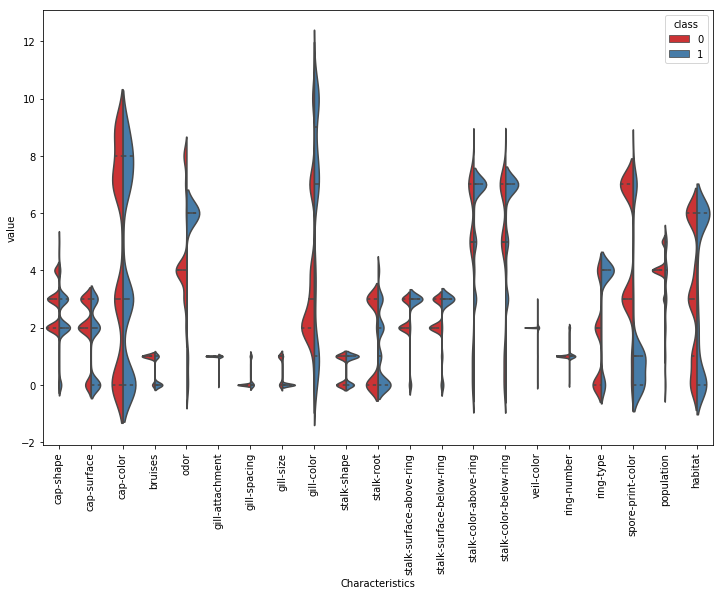

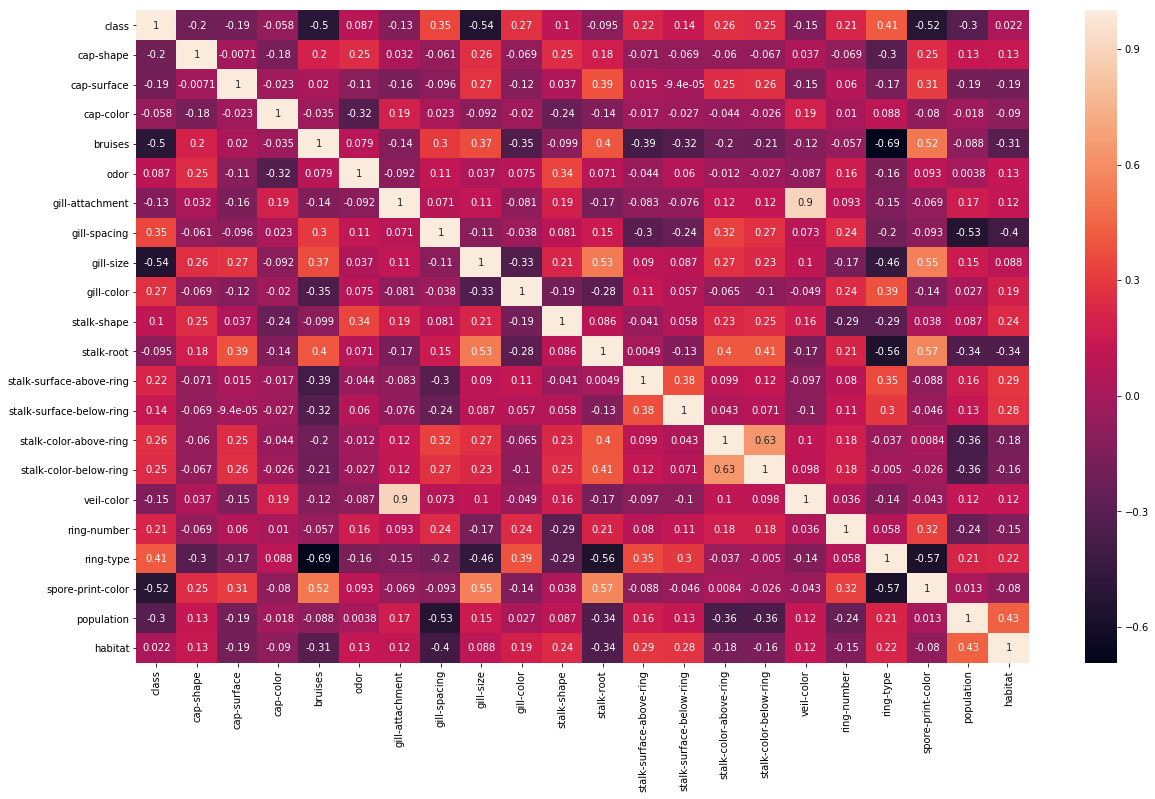

In [6]:
# 以下のバイオリンプロットは、分類特性の分布を表しています。
# キノコの「gill-color」の特性が、2つの部分（3未満と3を超える部分）に分かれている。
print('\n▼ バイオリンプロットで各項目の特性を確認')
df_div = pd.melt(df, "class", var_name="Characteristics")
fig, ax = plt.subplots(figsize=(12,8))
p = sns.violinplot(ax = ax, x="Characteristics",
                   y="value", 
                   hue="class",
                   split = True,
                   data=df_div,
                   inner = 'quartile',
                   palette = 'Set1')
df_no_class = df.drop(["class"],axis = 1)
p.set_xticklabels(rotation = 90, labels = list(df_no_class.columns))
plt.show()

# ヒートマップで相関関係を確認
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(), annot=True)
plt.yticks(rotation=0);
plt.show()


# 4. モデル構築<a id='modeling'></a>
- SVC_rbf サポートベクターマシン(RBFカーネル)
- SVC_linear サポートベクターマシン（線形カーネル）
- SVM サポートベクターマシン
- LogisticRegression ロジスティック回帰
- KNeighborsClassifier K-近傍法
- KMeans K-平均法
- DecisionTreeClassifier 決定木
- GaussianNB ガウシアン単純ベイズ
- RandomForestClassifier ランダムフォレスト
- SGDClassifier クラス分類（ロジスティック回帰）

In [7]:
# ホールドアウト法
train, test = train_test_split(df, test_size = 0.2, random_state=1234) 

# Train set
train_y = train['class']
train_x = train[[x for x in train.columns if 'class' not in x]]

# Test/Validation set
test_y = test['class']
test_x = test[[x for x in test.columns if 'class' not in x]]

models = [SVC(kernel='rbf', random_state=0, gamma=1, C=5), 
          SVC(kernel='linear', random_state=0, C=5), 
          SVC(probability=True),
          LogisticRegression(),
          KNeighborsClassifier(),
          KMeans(n_clusters=2),
          DecisionTreeClassifier(),
          GaussianNB(),
          RandomForestClassifier(),
          SGDClassifier(loss='log',penalty='none',max_iter=10000,fit_intercept=True,random_state=1234,tol=1e-3)
         ]
model_names = ['SVC_rbf', # サポートベクターマシン(RBFカーネル)
               'SVC_linear', # サポートベクターマシン（線形カーネル）
               'SVM', # サポートベクターマシン
               'Logistic Regression', # ロジスティック回帰１
               'KNeighborsClassifier', # K-近傍法
               'KMeans', # K-平均法
               'DecisionTreeClassifier', # 決定木
               'GaussianNB', # ガウシアン単純ベイズ
               'RandomForestClassifier', # ランダムフォレスト
               'SGDClassifier' # クラス分類（ロジスティック回帰）
              ]


# 5. モデル評価<a id='model_evaluation'></a>

In [8]:
for i, model in enumerate(models):
    # 学習
    model.fit(train_x, train_y)
    # 予測
    y_test_pred = model.predict(test_x)
    
    print('\n\n▼ ' + str(model_names[i]) + 'モデルの評価結果 ───────────────────────')

    print ('正答率 = {:.3f}%'.format(100 * accuracy_score(test_y, y_test_pred)) )
    
    print('対数尤度 = {:.3f}'.format(- log_loss(test_y, y_test_pred)))

    # Precision, Recall, F1-scoreを計算
    precision, recall, f1_score, _ = precision_recall_fscore_support(test_y, y_test_pred)
    print('適合率（Precision※精度) = {:.3f}%'.format(100 * precision[0]))
    print('再現率（Recall※検出率) = {:.3f}%'.format(100 * recall[0]))
    print('F1値（F1-score） = {:.3f}%'.format(100 * f1_score[0]))

    # 予測値と正解のクロス集計
    #conf_mat = pd.DataFrame(confusion_matrix(test_y, y_test_pred), 
    #                    index=['正解 = 毒キノコ', '正解 =食用キノコ'], 
    #                    columns=['予測 = 毒キノコ', '予測 = 食用キノコ'])
    #display(conf_mat)




▼ SVC_rbfモデルの評価結果 ───────────────────────
正答率 = 99.385%
対数尤度 = -0.213
適合率（Precision※精度) = 100.000%
再現率（Recall※検出率) = 98.762%
F1値（F1-score） = 99.377%


▼ SVC_linearモデルの評価結果 ───────────────────────
正答率 = 96.862%
対数尤度 = -1.084
適合率（Precision※精度) = 95.657%
再現率（Recall※検出率) = 98.144%
F1値（F1-score） = 96.885%


▼ SVMモデルの評価結果 ───────────────────────
正答率 = 100.000%
対数尤度 = -0.000
適合率（Precision※精度) = 100.000%
再現率（Recall※検出率) = 100.000%
F1値（F1-score） = 100.000%


▼ Logistic Regressionモデルの評価結果 ───────────────────────
正答率 = 95.262%
対数尤度 = -1.637
適合率（Precision※精度) = 94.519%
再現率（Recall※検出率) = 96.040%
F1値（F1-score） = 95.273%


▼ KNeighborsClassifierモデルの評価結果 ───────────────────────
正答率 = 100.000%
対数尤度 = -0.000
適合率（Precision※精度) = 100.000%
再現率（Recall※検出率) = 100.000%
F1値（F1-score） = 100.000%


▼ KMeansモデルの評価結果 ───────────────────────
正答率 = 67.446%
対数尤度 = -11.244
適合率（Precision※精度) = 64.888%
再現率（Recall※検出率) = 75.248%
F1値（F1-score） = 69.685%


▼ DecisionTreeClassifierモデルの評価結果 ───────────────────────
正答率 = 10